In [1]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/home/l2-51/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Data Class Proportions:
Normal: 621 OSCC: 2032


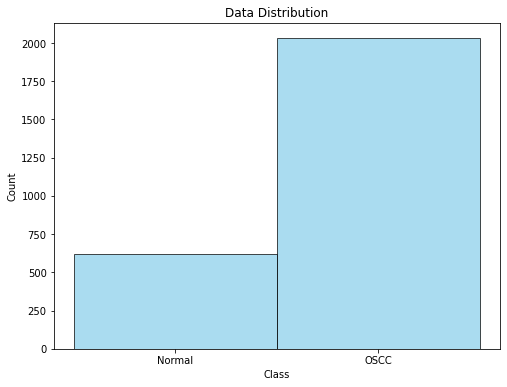

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/l2-51/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a given folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label to the labels list
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert data to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Print class proportions
print("Data Class Proportions:")
print("Normal:", np.sum(all_labels == 0), "OSCC:", np.sum(all_labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(all_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Normal Images: (600, 224, 224)
OSCC Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


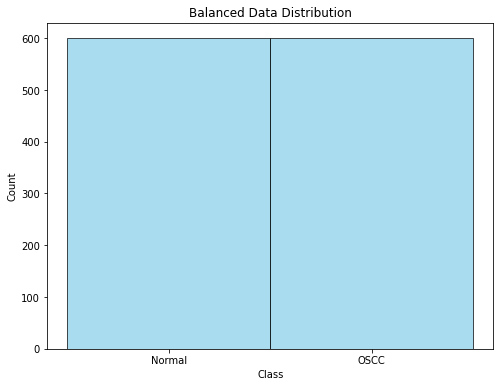

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = "/home/l2-51/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for NORMAL, 1 for OSCC) to the labels list
        labels.append(0 if class_name == 'NORMAL' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = images[labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = images[labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = labels[labels == 0][:600]
oscc_labels = labels[labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Normal Images:", normal_images.shape)
print("OSCC Images:", oscc_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Plot histogram for the balanced class distribution
plt.figure(figsize=(8, 6))
plt.hist(balanced_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balanced Data Distribution')
plt.show()


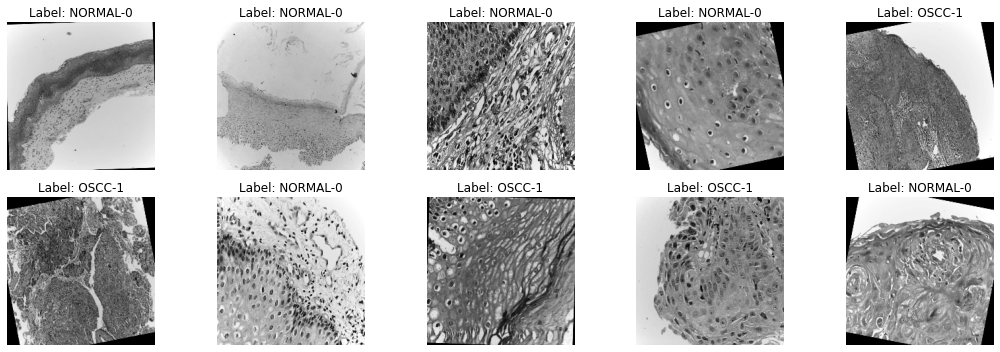

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL-0" or "OSCC-1"
    label_text = 'NORMAL-0' if label == 0 else 'OSCC-1'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


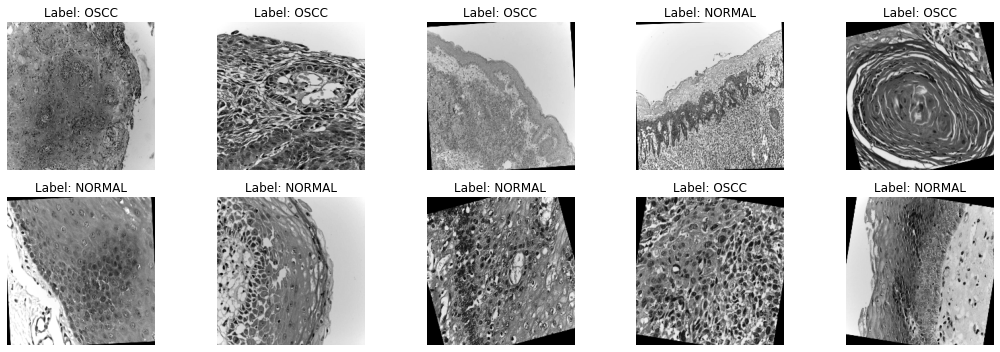

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL" or "OSCC"
    label_text = 'NORMAL' if label == 0 else 'OSCC'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


# VGG 19

# Dense

2024-11-16 15:25:16.255606: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 15:25:16.260150: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 15:25:16.303822: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 15:25:16.362326: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-16 15:25:16.407292: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 20,024,897 (76.39 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4887 - loss: 0.3568 - val_accuracy: 0.5573 - val_loss: 0.2484
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.4588 - loss: 0.2589 - val_accuracy: 0.4427 - val_loss: 0.2591
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4877 - loss: 0.2542 - val_accuracy: 0.4479 - val_loss: 0.2512
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4951 - loss: 0.2503 - val_accuracy: 0.4427 - val_loss: 0.2519
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4423 - loss: 0.2711
Test Accuracy: 49.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    accuracy                           0.49       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.24   

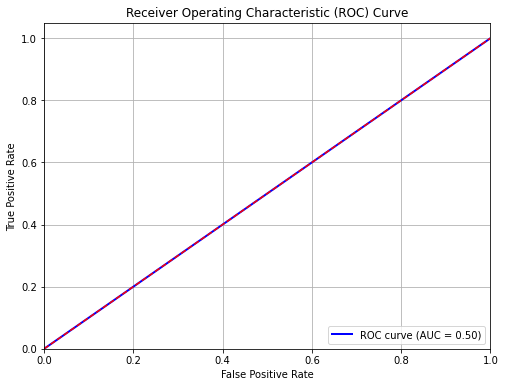

Time taken: 196.13 seconds


In [6]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import cv2
import time

# Start time
start_time = time.time()

# Assuming X_train and y_train are your original data
# Assuming X_test and y_test are your test data

# Convert images to RGB
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG19
X_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_test_rgb)

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head with only Dense layer
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=150, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_test, test_predictions)

# Calculate Recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Log Loss
logloss = log_loss(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save the model
model.save('vgg19_dense_only_model.h5')


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 20,024,897 (76.39 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4775 - loss: 0.2596 - val_accuracy: 0.4427 - val_loss: 0.2533
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4824 - loss: 0.2517 - val_accuracy: 0.4427 - val_loss: 0.2549
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5166 - loss: 0.2501 - val_accuracy: 0.4427 - val_loss: 0.2511
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5220 - loss: 0.2499 - val_accuracy: 0.5260 - val_loss: 0.2498
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4975 - loss: 0.2505 - val_accuracy: 0.4427 - val_loss: 0.2532
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5054 - loss: 0.2505 - val_accuracy: 0.5573 - val_loss: 0.2495
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4910 - loss: 0.2502 - val_accuracy: 0.4427 - val_loss: 0.2548
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5171 - loss: 0.2503 - val_accuracy: 0.4531 - v

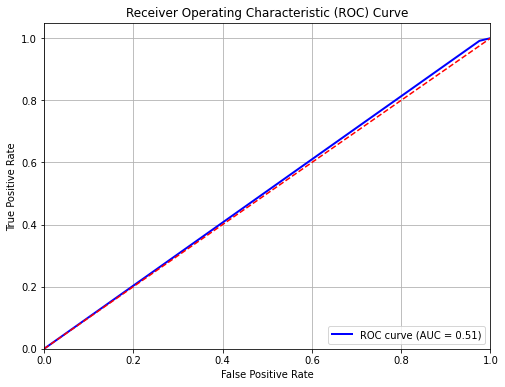

Time taken: 428.40 seconds


In [7]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import cv2
import time

# Start time
start_time = time.time()

# Assuming X_train and y_train are your original data
# Assuming X_test and y_test are your test data

# Convert images to RGB
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG19
X_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_test_rgb)

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head with only Dense layer
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=200, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_test, test_predictions)

# Calculate Recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Log Loss
logloss = log_loss(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save the model
model.save('vgg19_dense_only_model.h5')


# Dense  +  DropOut

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,418,625 (77.89 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4861 - loss: 0.3279 - val_accuracy: 0.4427 - val_loss: 0.2793
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4907 - loss: 0.3005 - val_accuracy: 0.5573 - val_loss: 0.2891
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5083 - loss: 0.2941 - val_accuracy: 0.5573 - val_loss: 0.2495
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4198 - loss: 0.2892 - val_accuracy: 0.4427 - val_loss: 0.2530
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5085 - loss: 0.2527 - val_accuracy: 0.5573 - val_loss: 0.2480
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4857 - loss: 0.2600 - val_accuracy: 0.4427 - val_loss: 0.2622
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5363 - loss: 0.2541 - val_accuracy: 0.4427 - val_loss: 0.2551
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5122 - loss: 0.2605 - val_accuracy: 0.5573 - v

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    accuracy                           0.49       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.24      0.49      0.32       240

AUC Score: 0.50

Accuracy: 0.49166667461395264
Precision: [0.49166667 1.        ]
Recall: [1. 0.]
Specificity: 0.0
F1 Score: 0.659217877094972
ROC-AUC: 0.5
PR-AUC: 0.7458333333333333
Log Loss: 18.322190472801214
Matthews Correlation Coefficient: 0.0
Intersection over Union (IoU): 0.49166666666666664
Dice Coefficient: 0.659217877094972


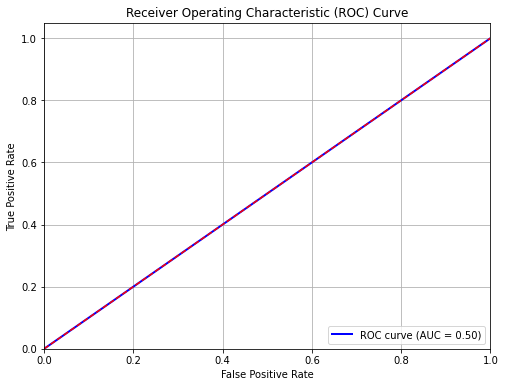

Time taken: 383.66 seconds
Model saved successfully.


In [8]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import cv2
import time

# Start time
start_time = time.time()

# Assuming X_train and y_train are your original data
# Assuming X_test and y_test are your test data

# Convert images to RGB
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG16
X_train_preprocessed = tf.keras.applications.vgg16.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg16.preprocess_input(X_test_rgb)

# Load pre-trained VGG16 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head with additional Dense and Dropout layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=150, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_test, test_predictions)

# Calculate Recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Log Loss
logloss = log_loss(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save the model
model.save('vgg19_custom_classification.h5')
print("Model saved successfully.")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,418,625 (77.89 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5311 - loss: 0.3384 - val_accuracy: 0.5573 - val_loss: 0.2620
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4738 - loss: 0.3165 - val_accuracy: 0.4427 - val_loss: 0.2578
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5404 - loss: 0.2707 - val_accuracy: 0.4427 - val_loss: 0.2944
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4903 - loss: 0.2749 - val_accuracy: 0.4427 - val_loss: 0.2541
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5194 - loss: 0.2650 - val_accuracy: 0.4427 - val_loss: 0.2642
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4777 - loss: 0.2642 - val_accuracy: 0.4427 - val_loss: 0.2575
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4737 - loss: 0.2587 - val_accuracy: 0.4427 - val_loss: 0.2658
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5577 - loss: 0.2475
Test Accuracy: 50.83%


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26      0.51      0.34       240

AUC Score: 0.50

Accuracy: 0.5083333253860474
Precision: [0.49166667 1.        ]
Recall: [1. 0.]
Specificity: 1.0
F1 Score: 0.0
ROC-AUC: 0.5
PR-AUC: 0.7458333333333333
Log Loss: 17.721462916315932
Matthews Correlation Coefficient: 0.0
Intersection over Union (IoU): 0.0
Dice Coefficient: 0.0


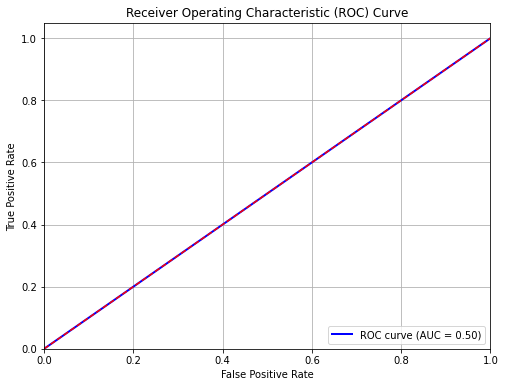

Time taken: 338.97 seconds
Model saved successfully.


In [9]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import cv2
import time

# Start time
start_time = time.time()

# Assuming X_train and y_train are your original data
# Assuming X_test and y_test are your test data

# Convert images to RGB
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG16
X_train_preprocessed = tf.keras.applications.vgg16.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg16.preprocess_input(X_test_rgb)

# Load pre-trained VGG16 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head with additional Dense and Dropout layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=200, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_test, test_predictions)

# Calculate Recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Log Loss
logloss = log_loss(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save the model
model.save('vgg19_custom_classification.h5')
print("Model saved successfully.")


# Dense + Dropout + maxPooling

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3, 3, 512)      │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 3, 512)      │             

 Total params: 20,418,625 (77.89 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4963 - loss: 2.3517 - val_accuracy: 0.5573 - val_loss: 0.6859
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4989 - loss: 1.2949 - val_accuracy: 0.5521 - val_loss: 0.6868
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4833 - loss: 1.1504 - val_accuracy: 0.4427 - val_loss: 0.7329
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5543 - loss: 0.8939 - val_accuracy: 0.5573 - val_loss: 0.6847
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4880 - loss: 0.8546 - val_accuracy: 0.4427 - val_loss: 0.6949
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5369 - loss: 0.8144 - val_accuracy: 0.4427 - val_loss: 0.7076
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4912 - loss: 0.8260 - val_accuracy: 0.4427 - val_loss: 0.7006
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4423 - loss: 0.7100
Test Accuracy: 49.17%
8/8 ━━━━━━━━━━━━━━

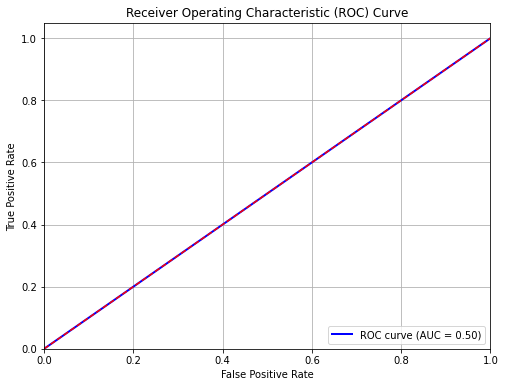

Time taken: 341.71 seconds
Model saved successfully.


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.model_selection import train_test_split

# Start time
start_time = time.time()

# Assuming X_train and y_train are your preprocessed training data
# Assuming X_test and y_test are your preprocessed test data

# Convert grayscale images to RGB (VGG19 requires 3 channels)
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG19
X_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_test_rgb)

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding Dropout for regularization
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)  # Adding Dropout for regularization
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)  # Explicit usage of Flatten
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=150, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_test, test_predictions)

# Calculate Recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Log Loss
logloss = log_loss(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save the model
model.save('vgg19_custom_classification.h5')
print("Model saved successfully.")


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3, 3, 512)      │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 3, 512)      │             

 Total params: 20,418,625 (77.89 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4899 - loss: 1.9945 - val_accuracy: 0.4427 - val_loss: 0.7831
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5224 - loss: 1.2169 - val_accuracy: 0.5573 - val_loss: 0.6882
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5109 - loss: 0.9771 - val_accuracy: 0.5573 - val_loss: 0.7194
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4939 - loss: 0.9136 - val_accuracy: 0.5573 - val_loss: 0.6913
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5348 - loss: 0.8663 - val_accuracy: 0.4427 - val_loss: 0.7618
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4423 - loss: 0.7276
Test Accuracy: 49.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    acc

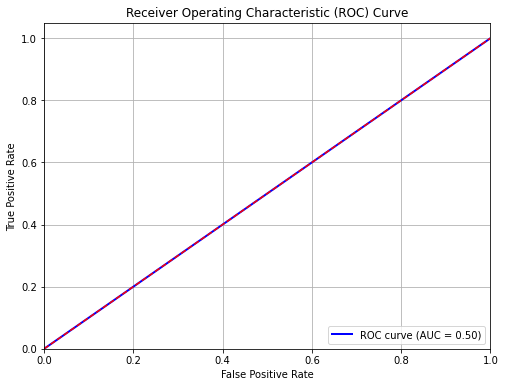

Time taken: 250.94 seconds
Model saved successfully.


In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.model_selection import train_test_split

# Start time
start_time = time.time()

# Assuming X_train and y_train are your preprocessed training data
# Assuming X_test and y_test are your preprocessed test data

# Convert grayscale images to RGB (VGG19 requires 3 channels)
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG19
X_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_test_rgb)

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding Dropout for regularization
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)  # Adding Dropout for regularization
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)  # Explicit usage of Flatten
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=200, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_test, test_predictions)

# Calculate Recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Log Loss
logloss = log_loss(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save the model
model.save('vgg19_custom_classification.h5')
print("Model saved successfully.")


# Dropout + averagepooling + Dense

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 64)       │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 3, 3, 64)       │             

 Total params: 20,644,289 (78.75 MB)

 Trainable params: 619,905 (2.36 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5139 - loss: 0.2617 - val_accuracy: 0.4427 - val_loss: 0.2515
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5299 - loss: 0.2497 - val_accuracy: 0.4427 - val_loss: 0.2508
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4770 - loss: 0.2504 - val_accuracy: 0.4427 - val_loss: 0.2504
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5056 - loss: 0.2501 - val_accuracy: 0.4427 - val_loss: 0.2508
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5170 - loss: 0.2499 - val_accuracy: 0.4427 - val_loss: 0.2517
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4794 - loss: 0.2507 - val_accuracy: 0.4427 - val_loss: 0.2507
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5577 - loss: 0.2496
Test Accuracy: 50.83%
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score 

<module 'matplotlib.pyplot' from '/home/l2-51/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

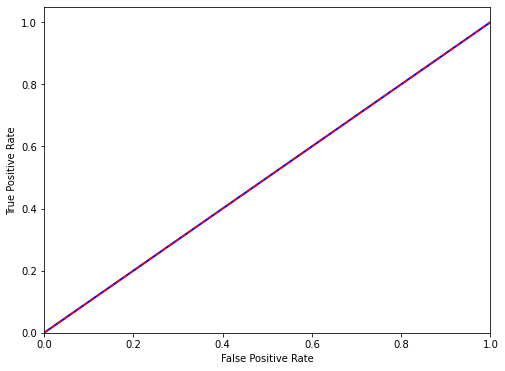

In [12]:
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import random
import time
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D
from tensorflow.keras.models import Model

# Constants
data_path = r"/home/l2-51/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label to the labels list
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert data to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = all_images[all_labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = all_images[all_labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = all_labels[all_labels == 0][:600]
oscc_labels = all_labels[all_labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Convert grayscale images to RGB format (as VGG19 requires 3-channel images)
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG19 (preprocess_input function normalizes images)
X_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_test_rgb)

# Load pre-trained VGG19 model (without the top classification layer)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = AveragePooling2D((2, 2))(x)

# Add layers if necessary
if x.shape[1] > 2 and x.shape[2] > 2:
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = AveragePooling2D((2, 2))(x)

if x.shape[1] > 2 and x.shape[2] > 2:
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = AveragePooling2D((2, 2))(x)

if x.shape[1] > 2 and x.shape[2] > 2:
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = AveragePooling2D((2, 2))(x)

if x.shape[1] > 2 and x.shape[2] > 2:
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = AveragePooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Start training
start_time = time.time()
history = model.fit(
    X_train_preprocessed, y_train, epochs=150, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Additional metrics
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
logloss = log_loss(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 3, 3, 64)       │             

 Total params: 20,644,289 (78.75 MB)

 Trainable params: 619,905 (2.36 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4721 - loss: 0.2541 - val_accuracy: 0.4427 - val_loss: 0.2517
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5030 - loss: 0.2505 - val_accuracy: 0.4427 - val_loss: 0.2513
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5407 - loss: 0.2494 - val_accuracy: 0.4427 - val_loss: 0.2501
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5382 - loss: 0.2497 - val_accuracy: 0.4427 - val_loss: 0.2502
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4533 - loss: 0.2503 - val_accuracy: 0.4427 - val_loss: 0.2504
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5336 - loss: 0.2498 - val_accuracy: 0.4427 - val_loss: 0.2514
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5577 - loss: 0.2499
Test Accuracy: 50.83%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score 

<module 'matplotlib.pyplot' from '/home/l2-51/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

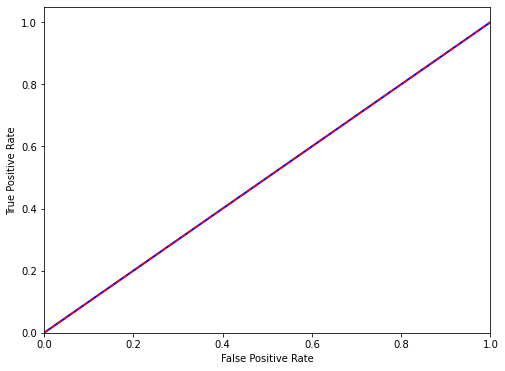

In [13]:
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import random
import time
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D
from tensorflow.keras.models import Model

# Constants
data_path = r"/home/l2-51/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label to the labels list
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert data to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = all_images[all_labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = all_images[all_labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = all_labels[all_labels == 0][:600]
oscc_labels = all_labels[all_labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Convert grayscale images to RGB format (as VGG19 requires 3-channel images)
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG19 (preprocess_input function normalizes images)
X_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_test_rgb)

# Load pre-trained VGG19 model (without the top classification layer)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = AveragePooling2D((2, 2))(x)

# Add layers if necessary
if x.shape[1] > 2 and x.shape[2] > 2:
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = AveragePooling2D((2, 2))(x)

if x.shape[1] > 2 and x.shape[2] > 2:
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = AveragePooling2D((2, 2))(x)

if x.shape[1] > 2 and x.shape[2] > 2:
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = AveragePooling2D((2, 2))(x)

if x.shape[1] > 2 and x.shape[2] > 2:
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = AveragePooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Start training
start_time = time.time()
history = model.fit(
    X_train_preprocessed, y_train, epochs=200, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Additional metrics
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
logloss = log_loss(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt


# Attention mechanism

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ input_layer_8[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv4        │ (None, 56, 56,    │    590,080 │ block3_conv3[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 28, 28,    │          0 │ block3_conv4[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 28, 28,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 28, 28,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 28, 28,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv4        │ (None, 28, 28,    │  2,359,808 │ block4_conv3[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 14, 14,    │          0 │ block4_conv4[0][

 Total params: 23,244,097 (88.67 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4998 - auc: 0.5009 - false_negatives: 188.7600 - false_positives: 18.0000 - loss: 0.4764 - precision: 0.4375 - recall: 0.1448 - true_negatives: 193.9600 - true_positives: 14.0000 - val_accuracy: 0.4427 - val_auc: 0.5000 - val_false_negatives: 107.0000 - val_false_positives: 0.0000e+00 - val_loss: 0.5573 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_negatives: 85.0000 - val_true_positives: 0.0000e+00
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5208 - auc: 0.5000 - false_negatives: 200.9200 - false_positives: 0.0000e+00 - loss: 0.4792 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_negatives: 213.8000 - true_positives: 0.0000e+00 - val_accuracy: 0.4427 - val_auc: 0.5000 - val_false_negatives: 107.0000 - val_false_positives: 0.0000e+00 - val_loss: 0.5573 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_negatives: 85.0000 - val_true_positives: 0.0000e+00
Epoch 3/150
24

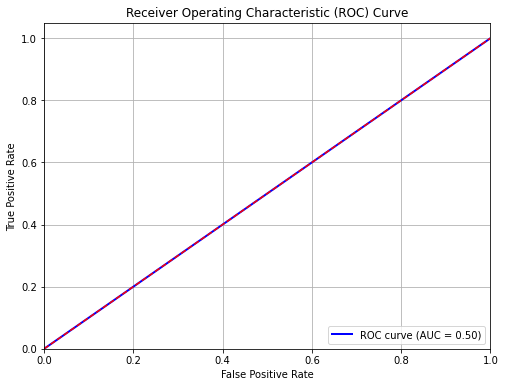

Time taken: 205.47 seconds


In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Input, Attention, Reshape
from tensorflow.keras.models import Model
import cv2
import time

# Start time
start_time = time.time()

# Ensure preprocessing from earlier steps
# Assuming X_train and y_train are your original data
# Assuming X_test and y_test are your test data

# Convert images to RGB (since VGG19 requires 3-channel images)
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG19
X_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_test_rgb)

# Load pre-trained VGG19 model (without the top layers)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to prevent training on them
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head with Attention Mechanism
x = base_model.output
x = Flatten()(x)  # Flatten the output of the base model

# Reshape the flattened tensor into 3D shape [batch_size, seq_len, features] for Attention layer
x = Reshape((1, x.shape[1]))(x)  # Reshaping to [batch_size, 1, features]

# Apply Attention mechanism to the features
x = Attention()([x, x])  # Attention expects 3D input: [batch_size, seq_len, features]

# Flatten the output from Attention and pass it through Dense layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)  # Dense layer with 128 units
x = Dense(64, activation='relu')(x)   # Dense layer with 64 units

output = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with binary crossentropy loss and specified metrics
model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC(),
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=150, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_auc, tp, fp, tn, fn = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test AUC: {test_auc:.2f}')
print(f'Test True Positives: {tp}')
print(f'Test False Positives: {fp}')
print(f'Test True Negatives: {tn}')
print(f'Test False Negatives: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate additional metrics
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Log Loss
logloss = log_loss(y_test, test_predictions)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ input_layer_9[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv4        │ (None, 56, 56,    │    590,080 │ block3_conv3[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 28, 28,    │          0 │ block3_conv4[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 28, 28,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 28, 28,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 28, 28,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv4        │ (None, 28, 28,    │  2,359,808 │ block4_conv3[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 14, 14,    │          0 │ block4_conv4[0][

 Total params: 23,244,097 (88.67 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4820 - auc_1: 0.4616 - false_negatives_1: 102.2000 - false_positives_1: 110.4800 - loss: 0.3952 - precision_1: 0.4520 - recall_1: 0.4652 - true_negatives_1: 99.8000 - true_positives_1: 102.2400 - val_accuracy: 0.4427 - val_auc_1: 0.5660 - val_false_negatives_1: 107.0000 - val_false_positives_1: 0.0000e+00 - val_loss: 0.2671 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_true_negatives_1: 85.0000 - val_true_positives_1: 0.0000e+00
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4774 - auc_1: 0.5024 - false_negatives_1: 136.6000 - false_positives_1: 77.1200 - loss: 0.2578 - precision_1: 0.3973 - recall_1: 0.2868 - true_negatives_1: 132.3200 - true_positives_1: 68.6800 - val_accuracy: 0.5573 - val_auc_1: 0.5694 - val_false_negatives_1: 0.0000e+00 - val_false_positives_1: 85.0000 - val_loss: 0.2512 - val_precision_1: 0.5573 - val_recall_1: 1.0000 - val_true_negatives_1: 0.0000e+00 - val_true_p

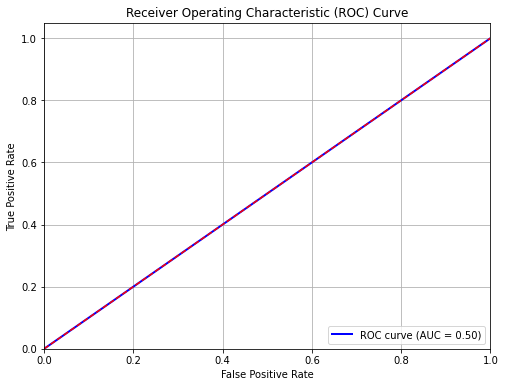

Time taken: 250.69 seconds


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Input, Attention, Reshape
from tensorflow.keras.models import Model
import cv2
import time

# Start time
start_time = time.time()

# Ensure preprocessing from earlier steps
# Assuming X_train and y_train are your original data
# Assuming X_test and y_test are your test data

# Convert images to RGB (since VGG19 requires 3-channel images)
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG19
X_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_test_rgb)

# Load pre-trained VGG19 model (without the top layers)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to prevent training on them
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head with Attention Mechanism
x = base_model.output
x = Flatten()(x)  # Flatten the output of the base model

# Reshape the flattened tensor into 3D shape [batch_size, seq_len, features] for Attention layer
x = Reshape((1, x.shape[1]))(x)  # Reshaping to [batch_size, 1, features]

# Apply Attention mechanism to the features
x = Attention()([x, x])  # Attention expects 3D input: [batch_size, seq_len, features]

# Flatten the output from Attention and pass it through Dense layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)  # Dense layer with 128 units
x = Dense(64, activation='relu')(x)   # Dense layer with 64 units

output = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with binary crossentropy loss and specified metrics
model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC(),
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=200, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_auc, tp, fp, tn, fn = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test AUC: {test_auc:.2f}')
print(f'Test True Positives: {tp}')
print(f'Test False Positives: {fp}')
print(f'Test True Negatives: {tn}')
print(f'Test False Negatives: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate additional metrics
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Log Loss
logloss = log_loss(y_test, test_predictions)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# convoluation

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 64)       │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 128)      │        73,85

 Total params: 27,886,529 (106.38 MB)

 Trainable params: 7,862,145 (29.99 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4989 - loss: 0.3078 - val_accuracy: 0.4427 - val_loss: 0.2502
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4984 - loss: 0.2501 - val_accuracy: 0.4427 - val_loss: 0.2504
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4984 - loss: 0.2500 - val_accuracy: 0.4427 - val_loss: 0.2506
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5124 - loss: 0.2499 - val_accuracy: 0.4427 - val_loss: 0.2507
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5577 - loss: 0.2498
Test Accuracy: 50.83%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26   

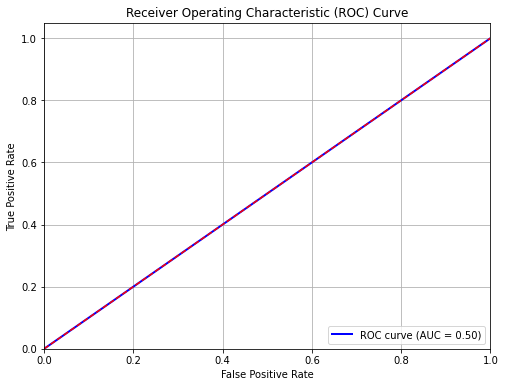

Time taken: 208.23 seconds
Model saved successfully.


In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.models import Model
import cv2
import time

# Start time
start_time = time.time()

# Assuming X_train and y_train are your original data
# Assuming X_test and y_test are your test data

# Convert images to RGB
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG16
X_train_preprocessed = tf.keras.applications.vgg16.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg16.preprocess_input(X_test_rgb)

# Load pre-trained VGG16 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)  # Flatten the output for the dense layers
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=150, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_test, test_predictions)

# Calculate Recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Log Loss
logloss = log_loss(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save the model
model.save('vgg19_custom_classification.h5')
print("Model saved successfully.")


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 64)       │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 128)      │        73,85

 Total params: 27,886,529 (106.38 MB)

 Trainable params: 7,862,145 (29.99 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4989 - loss: 0.3668 - val_accuracy: 0.5573 - val_loss: 0.2477
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4738 - loss: 0.2518 - val_accuracy: 0.5573 - val_loss: 0.2498
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4690 - loss: 0.2501 - val_accuracy: 0.4427 - val_loss: 0.2505
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5188 - loss: 0.2499 - val_accuracy: 0.4427 - val_loss: 0.2504
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4423 - loss: 0.2537
Test Accuracy: 49.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    accuracy                           0.49       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.24   

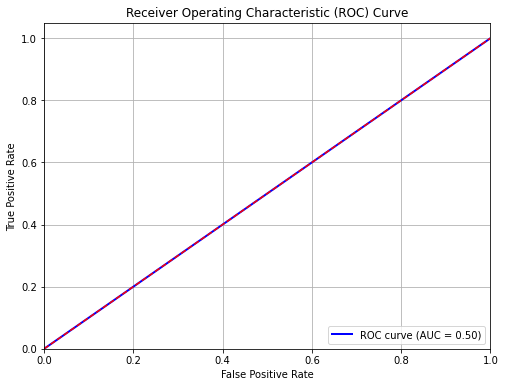

Time taken: 208.33 seconds
Model saved successfully.


In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.models import Model
import cv2
import time

# Start time
start_time = time.time()

# Assuming X_train and y_train are your original data
# Assuming X_test and y_test are your test data

# Convert images to RGB
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG16
X_train_preprocessed = tf.keras.applications.vgg16.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg16.preprocess_input(X_test_rgb)

# Load pre-trained VGG16 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)  # Flatten the output for the dense layers
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=200, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_test, test_predictions)

# Calculate Recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Log Loss
logloss = log_loss(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save the model
model.save('vgg19_custom_classification.h5')
print("Model saved successfully.")


# LSTM

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 7, 7, 64)       │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 128)      │        73,85

 Total params: 27,951,681 (106.63 MB)

 Trainable params: 7,927,297 (30.24 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5083 - loss: 0.8183 - val_accuracy: 0.5573 - val_loss: 0.6930
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4904 - loss: 0.6932 - val_accuracy: 0.4427 - val_loss: 0.6941
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5150 - loss: 0.6930 - val_accuracy: 0.4427 - val_loss: 0.6942
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5004 - loss: 0.6933 - val_accuracy: 0.4427 - val_loss: 0.6947
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4423 - loss: 0.6933
Test Accuracy: 49.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    accuracy                           0.49       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.24   

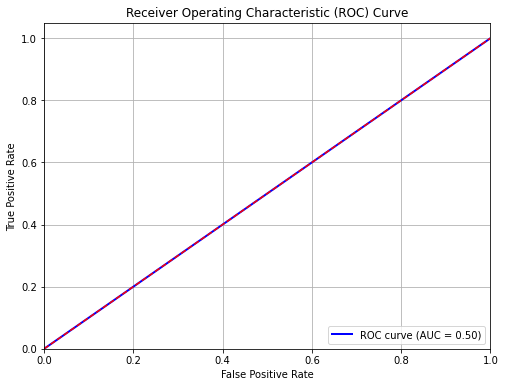

Time taken: 209.18 seconds
Model saved successfully.


In [18]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, Flatten, Reshape, LSTM, Dense
from tensorflow.keras.models import Model
import cv2
import time

# Start time
start_time = time.time()

# Assuming X_train and y_train are your original data
# Assuming X_test and y_test are your test data

# Convert images to RGB
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG19
X_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_test_rgb)

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)

# Flatten the output for the LSTM layers
x = Flatten()(x)

# Reshape it to (batch_size, timesteps, features) for LSTM
x = Reshape((-1, x.shape[-1]))(x)  # Reshape to be compatible with LSTM

# Add LSTM layer
lstm = LSTM(128)(x)

# Output layer
output = Dense(1, activation='sigmoid')(lstm)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=150, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_test, test_predictions)

# Calculate Recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Log Loss
logloss = log_loss(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save the model
model.save('vgg19_custom_classification_lstm.h5')
print("Model saved successfully.")


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 7, 7, 64)       │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 7, 7, 128)      │        73,85

 Total params: 27,951,681 (106.63 MB)

 Trainable params: 7,927,297 (30.24 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5024 - loss: 0.7587 - val_accuracy: 0.4427 - val_loss: 0.6932
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4427 - val_loss: 0.6937
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5257 - loss: 0.6929 - val_accuracy: 0.4427 - val_loss: 0.6951
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5124 - loss: 0.6929 - val_accuracy: 0.4427 - val_loss: 0.6946
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5577 - loss: 0.6931
Test Accuracy: 50.83%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26   

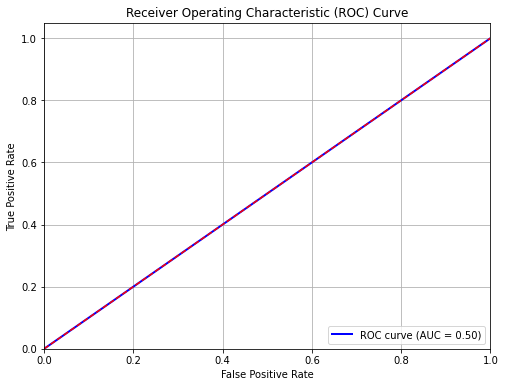

Time taken: 208.84 seconds
Model saved successfully.


In [19]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, matthews_corrcoef, jaccard_score, fbeta_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, Flatten, Reshape, LSTM, Dense
from tensorflow.keras.models import Model
import cv2
import time

# Start time
start_time = time.time()

# Assuming X_train and y_train are your original data
# Assuming X_test and y_test are your test data

# Convert images to RGB
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])

# Preprocess the data for VGG19
X_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_train_rgb)
X_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(X_test_rgb)

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)

# Flatten the output for the LSTM layers
x = Flatten()(x)

# Reshape it to (batch_size, timesteps, features) for LSTM
x = Reshape((-1, x.shape[-1]))(x)  # Reshape to be compatible with LSTM

# Add LSTM layer
lstm = LSTM(128)(x)

# Output layer
output = Dense(1, activation='sigmoid')(lstm)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train_preprocessed, y_train, epochs=200, validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback to the fit method
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_preprocessed) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision
precision = precision_score(y_test, test_predictions)

# Calculate Recall
recall = recall_score(y_test, test_predictions)

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)

# Calculate Log Loss
logloss = log_loss(y_test, test_predictions)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)

# Calculate Intersection over Union (IoU) and Dice Coefficient (assuming binary classification)
iou = jaccard_score(y_test, test_predictions)
dice_coefficient = fbeta_score(y_test, test_predictions, beta=1)

# Print additional metrics
print("\nAccuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient:", mcc)
print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice_coefficient)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save the model
model.save('vgg19_custom_classification_lstm.h5')
print("Model saved successfully.")
